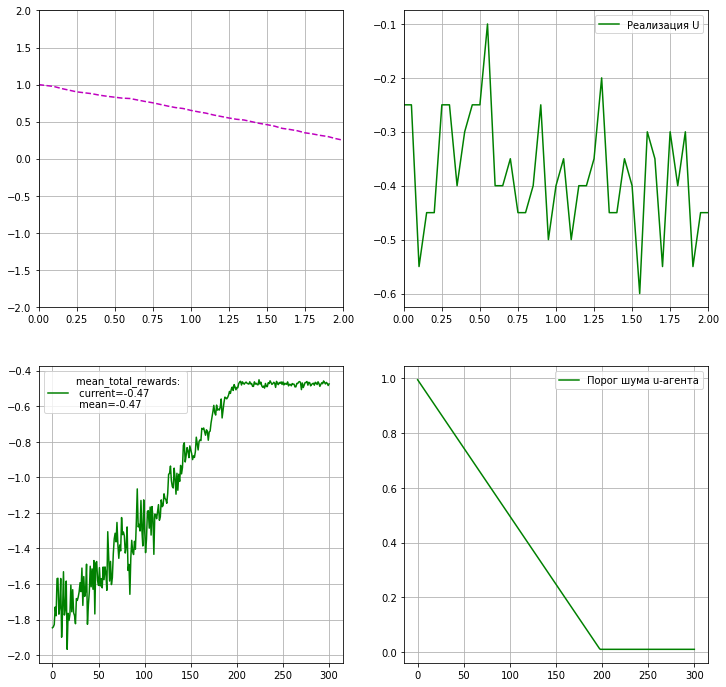

In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np
import torch.nn as nn
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
from Agents.CEM import CEM_Discrete
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import DiscreteUniformNoise
from Agents.Utilities.ContinuousAgentMakers.ContinuousAgentMaker import ContinuousAgentMaker
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 301
session_n = 20

#environment initialization
env = SimpleControlProblem()
action_n = 3
action_values = np.linspace(env.action_min, env.action_max, action_n).reshape(action_n, 1)

#agent initialization
CEM_Discrete = ContinuousAgentMaker(CEM_Discrete)
pi_model = SequentialNetwork([env.state_dim, 128, 64, action_n])
noise = DiscreteUniformNoise(action_n, threshold_decrease=1.5/(episode_n * session_n))
agent = CEM_Discrete(pi_model, noise, action_values=action_values, pi_model_lr=1e-2, 
                       tau=1e-2, percentile_param=70, learning_iter_per_fit=16)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=10)
solver.go(env, agent, episode_n=episode_n, show=visualizer.show, session_len=2500, session_n=session_n, agent_learning='by_sessions')